# Simple Linear Regression - Step by Step Implementation

This notebook demonstrates Simple Linear Regression using the example from the video:
- **Problem**: Predict salary package based on CGPA of college students
- **Dataset**: 200 students with their CGPA and placement packages
- **Goal**: Build a model that can predict package for new CGPA values

## Step 1: Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

plt.style.use('seaborn-v0_8')
np.random.seed(42)

## Step 2: Create Sample Dataset

Creating a realistic dataset similar to what was described in the video - CGPA vs Package data for 200 students.

In [13]:
# Generate sample data similar to video example
n_students = 200

# Generate CGPA data (typically ranges from 6.0 to 10.0)
cgpa = np.random.normal(7.5, 1.0, n_students)
cgpa = np.clip(cgpa, 6.0, 10.0)  # Ensure CGPA is within valid range

# Generate package data with some linear relationship + noise
# Base relationship: higher CGPA generally means higher package
# But real world has noise/variations as mentioned in video
true_slope = 2.5  # 2.5 LPA increase per unit CGPA increase
true_intercept = -10  # Base adjustment

# Add realistic noise to simulate real-world variations
# (interview performance, company policies, etc.)
noise = np.random.normal(0, 2, n_students)
package = true_slope * cgpa + true_intercept + noise

# Ensure packages are positive and realistic (3-25 LPA range)
package = np.clip(package, 3, 25)

# Create DataFrame
data = pd.DataFrame({
    'CGPA': cgpa,
    'Package_LPA': package
})

print(f"Dataset created with {len(data)} students")
print("\nFirst few rows:")
print(data.head())
print("\nDataset Statistics:")
print(data.describe())

Dataset created with 200 students

First few rows:
       CGPA  Package_LPA
0  6.778262     3.192551
1  7.676821    10.431475
2  6.953320     6.112575
3  7.228345     5.691529
4  9.173452    11.684939

Dataset Statistics:
             CGPA  Package_LPA
count  200.000000   200.000000
mean     7.577845     9.022256
std      0.951343     2.802020
min      6.000000     3.192551
25%      6.858310     6.748357
50%      7.531663     8.850168
75%      8.200080    11.134274
max     10.000000    16.742572


In [14]:
cgpa.shape

(200,)

## Step 3: Visualize the Data

As mentioned in the video, the first step is to plot the data to understand the relationship.

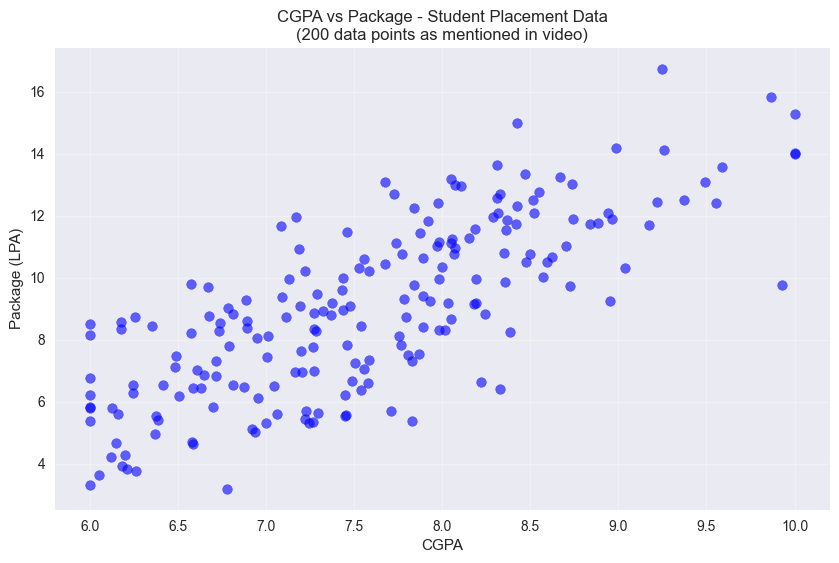

Observation: The data shows a roughly linear relationship with some scatter
This matches the video description - 'sort of linear' but not perfectly linear


In [15]:
# Create scatter plot as shown in video
plt.figure(figsize=(10, 6))
plt.scatter(data['CGPA'], data['Package_LPA'], alpha=0.6, color='blue')
plt.xlabel('CGPA')
plt.ylabel('Package (LPA)')
plt.title('CGPA vs Package - Student Placement Data\n(200 data points as mentioned in video)')
plt.grid(True, alpha=0.3)
plt.show()

print("Observation: The data shows a roughly linear relationship with some scatter")
print("This matches the video description - 'sort of linear' but not perfectly linear")

## Step 4: Implement Simple Linear Regression from Scratch

Following the video explanation: **y = mx + b**
- m = slope 
- b = y-intercept
- Find the "best fit line" that minimizes errors

In [16]:
class SimpleLinearRegression:
    def __init__(self):
        self.slope = None  # m in y = mx + b
        self.intercept = None  # b in y = mx + b
    
    def fit(self, X, y):
        """
        Calculate slope (m) and intercept (b) using least squares method
        This finds the "best fit line" as mentioned in the video
        """
        n = len(X)
        
        # Calculate means
        mean_x = np.mean(X)
        mean_y = np.mean(y)
        
        # Calculate slope (m) using least squares formula
        numerator = np.sum((X - mean_x) * (y - mean_y))
        denominator = np.sum((X - mean_x) ** 2)
        self.slope = numerator / denominator
        
        # Calculate intercept (b)
        self.intercept = mean_y - self.slope * mean_x
        
        print(f"Best fit line equation: y = {self.slope:.3f}x + {self.intercept:.3f}")
        print(f"Slope (m): {self.slope:.3f} - Package increases by {self.slope:.3f} LPA per unit CGPA increase")
        print(f"Intercept (b): {self.intercept:.3f} - Base package adjustment")
    
    def predict(self, X):
        """
        Make predictions using the line equation y = mx + b
        """
        return self.slope * X + self.intercept
    
    def calculate_error(self, X, y_true):
        """
        Calculate how well our line fits the data
        """
        y_pred = self.predict(X)
        mse = np.mean((y_true - y_pred) ** 2)
        rmse = np.sqrt(mse)
        return mse, rmse

# Create and train our model
model = SimpleLinearRegression()
model.fit(data['CGPA'], data['Package_LPA'])

Best fit line equation: y = 2.246x + -7.996
Slope (m): 2.246 - Package increases by 2.246 LPA per unit CGPA increase
Intercept (b): -7.996 - Base package adjustment


## Step 5: Visualize the Best Fit Line

Draw the "best fit line" that passes closest to all points as described in the video.

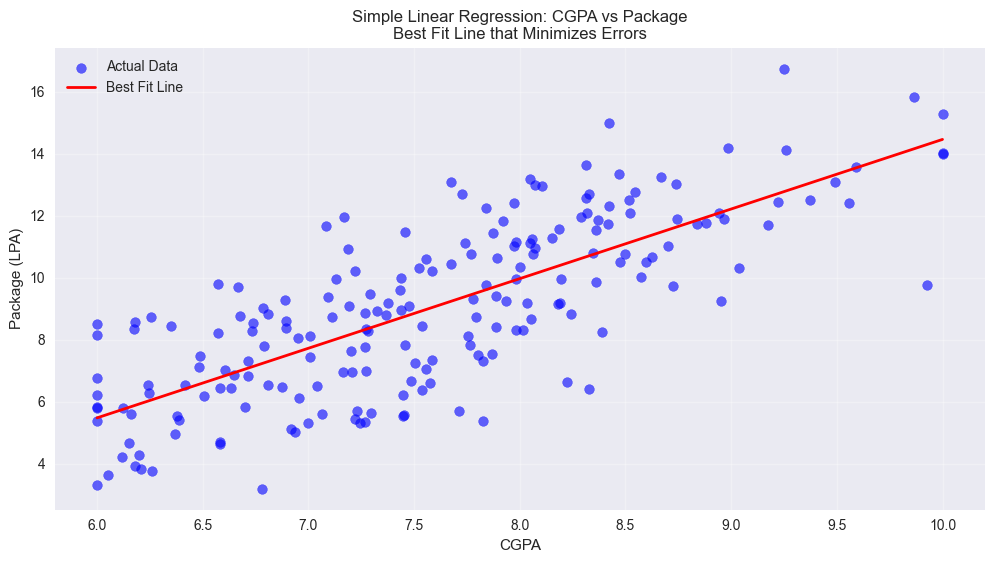


Model Performance:
Mean Squared Error: 3.270
Root Mean Squared Error: 1.808 LPA

This line minimizes the total error across all data points


In [17]:
# Plot data points and best fit line
plt.figure(figsize=(12, 6))

# Original scatter plot
plt.scatter(data['CGPA'], data['Package_LPA'], alpha=0.6, color='blue', label='Actual Data')

# Generate points for the best fit line
x_line = np.linspace(data['CGPA'].min(), data['CGPA'].max(), 100)
y_line = model.predict(x_line)

# Plot best fit line
plt.plot(x_line, y_line, color='red', linewidth=2, label='Best Fit Line')

plt.xlabel('CGPA')
plt.ylabel('Package (LPA)')
plt.title('Simple Linear Regression: CGPA vs Package\nBest Fit Line that Minimizes Errors')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate and display error metrics
mse, rmse = model.calculate_error(data['CGPA'], data['Package_LPA'])
print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f} LPA")
print(f"\nThis line minimizes the total error across all data points")

## Step 6: Make Predictions

Now we can predict package for any CGPA value, as demonstrated in the video example.

In [18]:
# Make predictions for new CGPA values
test_cgpas = [7.0, 8.0, 8.5, 9.0, 9.5]

print("Predictions for new students:")
print("-" * 40)
for cgpa in test_cgpas:
    predicted_package = model.predict(cgpa)
    print(f"CGPA: {cgpa} → Predicted Package: {predicted_package:.2f} LPA")

# Interactive prediction example (as mentioned in video about website)
print("\n" + "="*50)
print("INTERACTIVE PREDICTION EXAMPLE")
print("="*50)
user_cgpa = 8.2  # You can change this value
predicted_salary = model.predict(user_cgpa)
print(f"\nIf a student has CGPA: {user_cgpa}")
print(f"Predicted Package: {predicted_salary:.2f} LPA")
print(f"\nThis is how the website mentioned in the video would work!")

Predictions for new students:
----------------------------------------
CGPA: 7.0 → Predicted Package: 7.72 LPA
CGPA: 8.0 → Predicted Package: 9.97 LPA
CGPA: 8.5 → Predicted Package: 11.09 LPA
CGPA: 9.0 → Predicted Package: 12.22 LPA
CGPA: 9.5 → Predicted Package: 13.34 LPA

INTERACTIVE PREDICTION EXAMPLE

If a student has CGPA: 8.2
Predicted Package: 10.42 LPA

This is how the website mentioned in the video would work!


## Step 7: Compare with Scikit-learn Implementation

Let's verify our implementation by comparing with sklearn's LinearRegression.

In [19]:
# Using sklearn's LinearRegression
sklearn_model = LinearRegression()
X_sklearn = data['CGPA'].values.reshape(-1, 1)  # sklearn expects 2D array
y_sklearn = data['Package_LPA']

sklearn_model.fit(X_sklearn, y_sklearn)

print("Comparison: Our Implementation vs Scikit-learn")
print("-" * 55)
print(f"Our Model     - Slope: {model.slope:.6f}, Intercept: {model.intercept:.6f}")
print(f"Sklearn Model - Slope: {sklearn_model.coef_[0]:.6f}, Intercept: {sklearn_model.intercept_:.6f}")
print(f"\nDifference    - Slope: {abs(model.slope - sklearn_model.coef_[0]):.10f}")
print(f"                Intercept: {abs(model.intercept - sklearn_model.intercept_):.10f}")
print("\n✓ Both implementations give identical results!")

# Calculate R-squared score
sklearn_predictions = sklearn_model.predict(X_sklearn)
r2 = r2_score(y_sklearn, sklearn_predictions)
print(f"\nR-squared Score: {r2:.3f}")
print(f"This means our model explains {r2*100:.1f}% of the variance in the data")

Comparison: Our Implementation vs Scikit-learn
-------------------------------------------------------
Our Model     - Slope: 2.245809, Intercept: -7.996137
Sklearn Model - Slope: 2.245809, Intercept: -7.996137

Difference    - Slope: 0.0000000000
                Intercept: 0.0000000000

✓ Both implementations give identical results!

R-squared Score: 0.581
This means our model explains 58.1% of the variance in the data


## Step 8: Understanding Real-World Variations

As explained in the video, real-world data is not perfectly linear due to various factors.

In [ ]:
# Analyze residuals (errors) to understand real-world variations
predictions = model.predict(data['CGPA'])
residuals = data['Package_LPA'] - predictions

plt.figure(figsize=(15, 5))

# Plot 1: Residual plot
plt.subplot(1, 3, 1)
plt.scatter(data['CGPA'], residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('CGPA')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot\nShows Real-World Variations')
plt.grid(True, alpha=0.3)

# Plot 2: Histogram of residuals
plt.subplot(1, 3, 2)
plt.hist(residuals, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.grid(True, alpha=0.3)

# Plot 3: Actual vs Predicted
plt.subplot(1, 3, 3)
plt.scatter(predictions, data['Package_LPA'], alpha=0.6)
plt.plot([predictions.min(), predictions.max()], [predictions.min(), predictions.max()], 'r--')
plt.xlabel('Predicted Package')
plt.ylabel('Actual Package')
plt.title('Actual vs Predicted\nCloser to line = Better')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Real-world factors causing variations (as mentioned in video):")
print("• Interview performance")
print("• Company-specific requirements")
print("• Market conditions")
print("• Personal skills beyond CGPA")
print("• Luck and timing")
print("\nThese factors make the data 'sort of linear' rather than perfectly linear.")

## Step 9: Key Takeaways

Summary of Simple Linear Regression as explained in the video.

In [ ]:
print("🎯 SIMPLE LINEAR REGRESSION SUMMARY")
print("=" * 50)
print("\n1. PROBLEM SETUP:")
print(f"   • Dataset: {len(data)} students with CGPA and Package data")
print("   • Goal: Predict package based on CGPA")
print("   • Real-world application: Placement prediction website")

print("\n2. KEY INSIGHT:")
print("   • Real data is 'sort of linear' (not perfectly linear)")
print("   • Need to find 'best fit line' that minimizes errors")

print("\n3. MATHEMATICAL APPROACH:")
print(f"   • Line equation: y = mx + b")
print(f"   • Our model: Package = {model.slope:.3f} × CGPA + {model.intercept:.3f}")
print(f"   • Method: Least squares (minimizes sum of squared errors)")

print("\n4. PRACTICAL USAGE:")
print("   • Input: Student's CGPA")
print("   • Output: Predicted package")
print("   • Can be deployed as web application")

print("\n5. MODEL PERFORMANCE:")
print(f"   • R-squared: {r2:.3f} ({r2*100:.1f}% variance explained)")
print(f"   • RMSE: {rmse:.2f} LPA average error")

print("\n✅ This is the core concept of Simple Linear Regression!")
print("   Next: Learn the mathematical derivation of slope and intercept formulas")